<a href="https://colab.research.google.com/github/Tiziri-k/SIC-exercices/blob/master/NLP%20%26%20TensorFlow/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Coding Problem #0601

### "NLP Classification Analysis."

#### Answer the following questions by providing Python code:
#### Objectives:
- Pre-processing of text data.
- Create a TF IDF representation.
- Carry out the predictive analysis using the Naive Bayes algorithm. 

In [ ]:
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from nltk.corpus import stopwords
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
warnings.filterwarnings('ignore')     
nltk.download('stopwords')
import pandas as pd


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Slash\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Read in data:
Movie review data from Cornell CS department. <br>
- The data can be found [here](https://www.cs.cornell.edu/people/pabo/movie-review-data). <br>
- Download the “polarity dataset” and unzip. <br>
- Under the "txt_sentoken” folder, there are “pos” and “neg" subfolders. <br>

In [ ]:
# Specify the folder and read in the subfolders.
reviews = load_files('txt_sentoken/')
my_docs, y = reviews.data, reviews.target

In [ ]:
len(my_docs), len(y)

(2000, 2000)

In [ ]:
np.unique(y, return_counts=True)

(array([0, 1]), array([1000, 1000], dtype=int64))

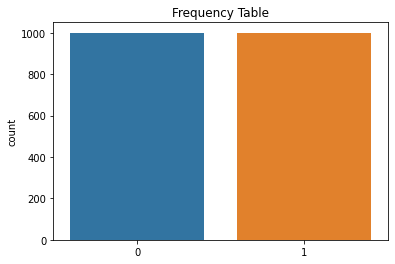

In [ ]:
# Visualize the response variable.
sns.countplot(y).set_title("Frequency Table")
plt.show()

1). Carry out the data pre-processing:

In [ ]:
def ProccData(txt):

    stpw = stopwords.words('english')
    stpw.extend(['www','http','utc'])
    stpw = set(stpw)
    
    txt = re.sub(r"\n", " ", txt)
    txt = re.sub("[\<\[].*?[\>\]]", " ", txt)
    txt = txt.lower()
    txt = re.sub(r"[^a-z ]", " ", txt)
    txt = re.sub(r"\b\w{1,3}\b", " ",txt)
    txt = " ".join([x for x in txt.split() if x not in stpw])
    return txt



In [ ]:
def load_data():
    # clean the data 
    ProccData(str(my_docs))
    #splitting data
    X_train, X_test, y_train, y_test = train_test_split(my_docs, y, test_size=0.4, random_state=123)
    X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=123)

    return X_train, X_val, X_test, y_train, y_val, y_test
X_train, X_val, X_test, y_train, y_val, y_test = load_data() 

In [ ]:

print("length of the training list: ",len(X_train))
print("length of the testing list: ",len(X_test))
print("length of the validation list: ",len(X_val))


length of the training list:  1200
length of the testing list:  400
length of the validation list:  400


2). Create a TF IDF representation.

In [ ]:
vect = TfidfVectorizer(decode_error='ignore',stop_words='english')
train_tfidf = vect.fit_transform(X_train)
val_tfidf = vect.transform(X_val)
test_tfidf = vect.transform(X_test)

3). Apply the Naive Bayes algorithm. Calculate the accuracy.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(decode_error='ignore',stop_words='english')
train_dtm=vect.fit_transform(X_train)
train_dtm

<1200x31922 sparse matrix of type '<class 'numpy.int64'>'
	with 290907 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB(alpha=0.01)
nb.fit(train_dtm, y_train)

MultinomialNB(alpha=0.01)

In [ ]:
MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

MultinomialNB(alpha=0.01)

In [ ]:
y_pred = nb.predict(train_dtm)
from sklearn import metrics
metrics.accuracy_score(y_train, y_pred)
 

0.9975